# ANÁLISIS INICIAL DE FICHEROS Y PREPARACIÓN DEL CASO

Usaremos datos ofrecidos por AirBnB en esta página: http://insideairbnb.com/get-the-data.html

Vamos a usar los datos de Marzo de 2025 para hacer todo el análisis y después presentaremos el modelo de ML a los datos de septiembre de 2025 para saber si hace buenas predicciones

## SETUP

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 400)


## ENTENDER LOS FICHEROS

En la web de AirBnB podemos ver la descripción de las tablas:

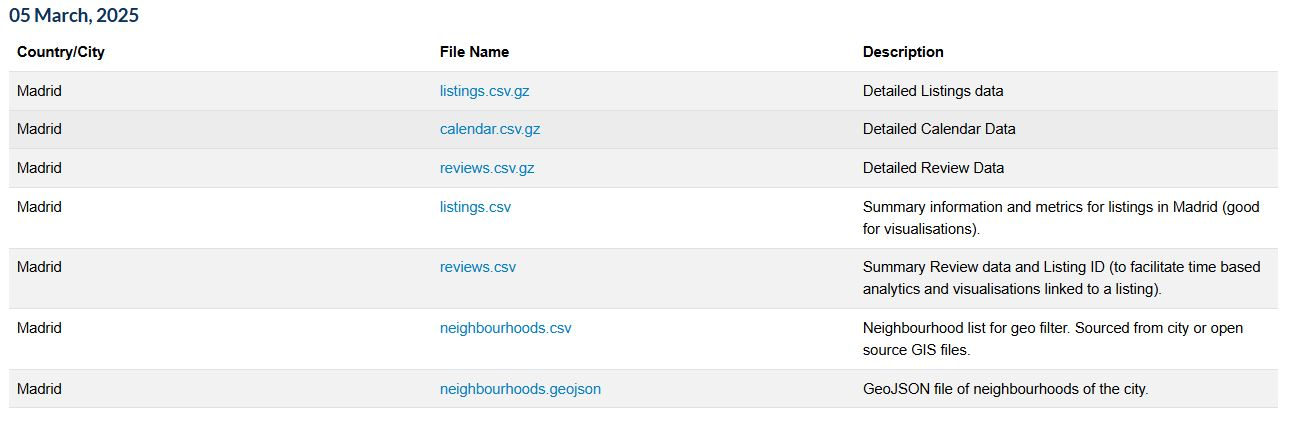

In [2]:
from IPython import display
display.Image("../../09_Otros/Airbnb_Mar25_image.jpg")

Vamos a cargar las tablas una por una, entenderlas y tomar decisión sobre si la usamos o no para realizar el análisis.

### Cargamos y entendemos listings agregados

In [8]:
listings = pd.read_csv('../../02_Datos/01_Originales/Airbnb_Mar25/listings.csv')

In [12]:
listings.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,29.0,4,33,2018-07-15,0.26,2,233,0,NaN
1,30320,Great Vacational Apartments,130907,Dana,Centro,Sol,40.41476,-3.70418,Entire home/apt,NaN,5,172,2022-09-26,0.96,3,0,0,NaN
2,30959,Beautiful loft in Madrid Center,132883,Angela,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,3,8,2017-05-30,0.07,1,0,0,NaN
3,40916,Holiday Apartment Madrid Center,130907,Dana,Centro,Universidad,40.42247,-3.70577,Entire home/apt,NaN,5,49,2021-12-11,0.28,3,0,0,NaN
4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,Arturo,Centro,Justicia,40.41884,-3.69655,Private room,77.0,1,227,2025-02-20,2.73,3,298,46,NaN
5,70059,Tu hogar en centro de Madrid.,353616,Diana,Centro,Universidad,40.42381,-3.71038,Entire home/apt,66.0,15,61,2022-12-19,0.36,1,54,0,VT-7440
6,70310,"Heart of Malasaña Cozy, Quiet & Sunny Apartment",353738,Raquel,Centro,Universidad,40.42252,-3.70250,Entire home/apt,89.0,30,29,2023-11-18,0.17,3,289,0,NaN
7,72150,Sunny attic duplex flat with terrace next to Sol,364585,Vin,Centro,Embajadores,40.41150,-3.70449,Entire home/apt,173.0,3,126,2025-03-02,0.74,4,163,17,VT-6993
8,82481,"Retiro Park, Stay at cosy studio",448981,Mercedes,Salamanca,Recoletos,40.42342,-3.68123,Entire home/apt,NaN,3,105,2017-11-29,0.62,1,0,0,NaN
9,84719,Cool Apart. (10min Center + WIFI),259229,Felipe,Centro,Embajadores,40.40866,-3.70374,Entire home/apt,72.0,7,184,2021-09-29,1.09,1,53,0,VT2922


In [11]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25288 non-null  int64  
 1   name                            25288 non-null  object 
 2   host_id                         25288 non-null  int64  
 3   host_name                       25269 non-null  object 
 4   neighbourhood_group             25288 non-null  object 
 5   neighbourhood                   25288 non-null  object 
 6   latitude                        25288 non-null  float64
 7   longitude                       25288 non-null  float64
 8   room_type                       25288 non-null  object 
 9   price                           19274 non-null  float64
 10  minimum_nights                  25288 non-null  int64  
 11  number_of_reviews               25288 non-null  int64  
 12  last_review                     

### Cargamos y entendemos listings detalle

In [35]:
listings_det = pd.read_csv('../../02_Datos/01_Originales/Airbnb_Mar25/listings.csv.gz',compression = 'gzip')

In [36]:
listings_det

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250914152907,2025-09-15,previous scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"['email', 'phone']",t,t,"Madrid, Spain",Cármenes,Latina,40.403810,-3.741300,Private room in rental unit,Private room,1,NaN,1 bath,NaN,NaN,"[""First aid kit"", ""Hair dryer"", ""Bed linens"", ...",NaN,4,40,4.0,4.0,40.0,40.0,4.0,40.0,NaN,t,0,0,0,198,2025-09-15,33,0,0,0,0,0,NaN,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,NaN,f,2,0,2,0,0.25
1,30320,https://www.airbnb.com/rooms/30320,20250914152907,2025-09-15,city scrape,Apartamentos Dana Sol,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,https://www.airbnb.com/users/show/130907,Danuta Weronika,2010-05-24,"Madrid, Spain",Apartasol offers a network of several spacious...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/130907/profil...,https://a0.muscache.com/im/users/130907/profil...,Sol,17.0,18.0,"['email', 'phone']",t,t,NaN,Sol,Centro,40.414760,-3.704180,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""TV with standard cable"", ""Elevator"", ""Air co...",$157.00,5,50,1.0,7.0,50.0,50.0,5.0,50.0,NaN,t,16,46,76,342,2025-09-15,173,1,1,88,0,10,1570.0,2010-07-06,2025-08-27,4.63,4.71,4.88,4.82,4.78,4.90,4.69,NaN,t,17,17,0,0,0.93
2,30959,https://www.airbnb.com/rooms/30959,20250914152907,2025-09-15,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,https://www.airbnb.com/users/show/132883,Angela,2010-05-26,"Madrid, Spain",Estoy empezando en Airbnb y deseo que mis hués...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/132883/profil...,https://a0.muscache.com/im/users/132883/profil...,Embajadores,1.0,4.0,"['email', 'phone']",t,f,NaN,Embajadores,Centro,40.412590,-3.701050,Entire loft,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""TV with standard cable"", ""Elevator"", ""Pets a...",NaN,3,730,3.0,3.0,730.0,730.0,3.0,730.0,NaN,NaN,0,0,0,0,2025-09-15,8,0,0,0,0,0,NaN,2015-05-12,2017-05-30,4.38,4.14,4.38,4.63,4.63,4.88,4.25,NaN,f,1,1,0,0,0.06
3,40916,https://www.airbnb.com/rooms/40916,20250914152907,2025-09-15,city scrape,Apartasol Apartamentos

In [ ]:
#Hacemos un orden por last_scraped para comprobar que las fechas comienzan en Marzo 2025
listings_det.sort_values('last_scraped', ascending=True).head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
19698,1167179236411079163,https://www.airbnb.com/rooms/1167179236411079163,20250305023340,2025-03-05,city scrape,Nuevo apartamento a 25 minutos del centro Madrid,"We are waiting for you in our new apartment, n...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,65656674,https://www.airbnb.com/users/show/65656674,Diego,2016-04-03,"Madrid, Spain","Soy Diego, graduado en Turismo, me encanta via...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,NaN,33.0,45.0,"['email', 'phone']",t,t,NaN,Palomeras Sureste,Puente de Vallecas,40.388711,-3.641378,Entire rental unit,Entire home/apt,5,1.0,1 bath,2.0,3.0,"[""Single level home"", ""Air conditioning"", ""Iro...",$82.00,2,365,2,2,365,365,2.0,365.0,NaN,t,18,29,42,112,2025-03-05,45,45,4,112,35,255,20910.0,2024-06-03,2025-02-23,4.71,4.87,4.82,4.73,4.78,4.53,4.60,NaN,t,31,17,14,0,4.89
13527,872214390829977722,https://www.airbnb.com/rooms/872214390829977722,20250305023340,2025-03-05,city scrape,Habitación en Puerta del Ángel,"Private room in the heart of Puerta del Ángel,...","Quiet neighborhood, with all amenities, parks ...",https://a0.muscache.com/pictures/miso/Hosting-...,285234298,https://www.airbnb.com/users/show/285234298,Pablo,2019-08-13,"Madrid, Spain",NaN,within a day,100%,72%,t,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,NaN,1.0,1.0,"['email', 'phone']",t,t,"Madrid, Comunidad de Madrid, Spain",Puerta del Angel,Latina,40.409445,-3.729029,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Portable fans"", ""Iron"", ""Wifi"", ""Blender"", ""...",$45.00,2,25,2,2,25,25,2.0,25.0,NaN,t,29,59,89,179,2025-03-05,31,14,0,179,13,84,3780.0,2023-05-02,2025-01-06,4.97,4.87,4.48,4.97,4.94,4.65,4.81,NaN,f,1,0,1,0,1.38
22258,1268084871262208185,https://www.airbnb.com/rooms/1268084871262208185,20250305023340,2025-03-05,city scrape,Salamanca Prestige,This luxurious apartment is designed to comfor...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,657271937,https://www.airbnb.com/users/show/657271937,Andres,2024-10-15,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,4.0,4.0,['phone'],f,t,NaN,Goya,Salamanca,40.426610,-3.670900,Entire rental unit,Entire home/apt,4,2.0,2 baths,2.0,2.0,"[""Pocket wifi"", ""Air conditioning"", ""Housekeep...",$183.00,1,365,1,3,365,365,1.6,365.0,NaN,t,10,15,27,77,2025-03-05,18,18,3,46,8,108,19764.0,2024-11-24,2025-02-22,4.78,4.72,4.89,4

In [24]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25288 non-null  int64  
 1   listing_url                                   25288 non-null  object 
 2   scrape_id                                     25288 non-null  int64  
 3   last_scraped                                  25288 non-null  object 
 4   source                                        25288 non-null  object 
 5   name                                          25288 non-null  object 
 6   description                                   24375 non-null  object 
 7   neighborhood_overview                         11218 non-null  object 
 8   picture_url                                   25287 non-null  object 
 9   host_id                                       25288 non-null 

In [25]:
listings.shape

(25288, 18)

In [26]:
listings_det.shape

(25288, 79)

Conclusiones: 

* Parece que listings_det es una versión con información extendida de listings, ya que contienen los mismos registros pero el fichero de detalle tiene más columnas.
* Podríamos unirlas mediante el campo id

### Cargamos y entendemos reviews agregado

In [31]:
reviews = pd.read_csv('../../02_Datos/01_Originales/Airbnb_Mar25/reviews.csv')

In [33]:
reviews

,listing_id,date
0,21853,2014-10-10
1,21853,2014-10-13
2,21853,2014-11-09
3,21853,2014-11-11
4,21853,2014-11-16
...,...,...
1205942,1362269516802674455,2025-03-02
1205943,1362294249473405797,2025-03-08
1205944,1363108943441808161,2025-03-04
1205945,1363864322767226922,2025-03-02


In [34]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205947 entries, 0 to 1205946
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1205947 non-null  int64 
 1   date        1205947 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.4+ MB


### Cargamos y entendemos reviews detalle

In [37]:
reviews_det = pd.read_csv('../../02_Datos/01_Originales/Airbnb_Mar25/reviews.csv.gz',compression = 'gzip')

In [39]:
reviews_det

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,354838,1100092,2012-04-08,926074,Masahiko,Juan Pedro was a nice host. JP provided detail...
1,354838,2062149,2012-08-22,1915019,Jean-Marc,Very clean and neat appartment. I would recomm...
2,354838,2333538,2012-09-18,2880602,Ekaterina,"Juanpe is open, honest and absolutely reliable..."
3,354838,2412223,2012-09-25,751843,Ahmet,The place is nice and in a great location. We ...
4,354838,2466170,2012-10-01,3214589,Ani,"Juanpe is amazing person, he left all info reg..."
...,...,...,...,...,...,...
1275987,1477618173421216086,1487624970914547267,2025-08-14,401797295,Zarela,Excelente anfitrión
1275988,1477618173421216086,1493458019493134812,2025-08-22,522550369,Julio Isaías,"Departamento muy cómodo y bonito, a unos 20min..."
1275989,1477618173421216086,1494869191583980239,2025-08-24,681938832,Carmen Dolores,Un sitio muy limpio y en el que se está tranqu...
1275990,1477618173421216086,1495617573207593376,2025-08-25,474146370,Steffanie,"buena ubicación, el lugar está cómodo y lindo ..."


Conclusiones: 

* Son los mismos registros pero el fichero de detalle tiene más columnas.
* No tenemos claro si esta info de las reseñas nos aporta valor añadido a nuestro objetivo, así que no usaremos estas tablas por el momento

### Cargamos y entendemos calendar

In [40]:
calendar = pd.read_csv('../../02_Datos/01_Originales/Airbnb_Mar25/calendar.csv.gz',compression = 'gzip')

In [41]:
calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,21853,2025-09-15,f,NaN,NaN,4,40
1,21853,2025-09-16,f,NaN,NaN,4,40
2,21853,2025-09-17,f,NaN,NaN,4,40
3,21853,2025-09-18,f,NaN,NaN,4,40
4,21853,2025-09-19,f,NaN,NaN,4,40
5,21853,2025-09-20,f,NaN,NaN,4,40
6,21853,2025-09-21,f,NaN,NaN,4,40
7,21853,2025-09-22,f,NaN,NaN,4,40
8,21853,2025-09-23,f,NaN,NaN,4,40
9,21853,2025-09-24,f,NaN,NaN,4,40


In [42]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125007 entries, 0 to 9125006
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           float64
 4   adjusted_price  float64
 5   minimum_nights  int64  
 6   maximum_nights  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 487.3+ MB


Conclusiones:

* Esta tabla se proyecta hacia el futuro, y parece contener la disponibilidad de reservas
* No es información que nos sirva a nuestros fines y por tanto no la usaremos

### Cargamos y entendemos neighbourhoods.csv

In [43]:
neigh = pd.read_csv('../../02_Datos/01_Originales/Airbnb_Mar25/neighbourhoods.csv')

In [44]:
neigh.head(10)

,neighbourhood_group,neighbourhood
0,Arganzuela,Acacias
1,Arganzuela,Atocha
2,Arganzuela,Chopera
3,Arganzuela,Delicias
4,Arganzuela,Imperial
5,Arganzuela,Legazpi
6,Arganzuela,Palos de Moguer
7,Barajas,Aeropuerto
8,Barajas,Alameda de Osuna
9,Barajas,Casco Histórico de Barajas


Conclusiones:

* Es simplemente un maestro de vecindario y grupo de vecindario
* En principio no la usaremos, ya que tanto el vecindario como su grupo ya están incorporados en otras tablas

### Cargamos y entendemos neighbourhoods.geojson

In [45]:
neigh_geo = pd.read_json('../../02_Datos/01_Originales/Airbnb_Mar25/neighbourhoods.geojson')

In [46]:
neigh_geo.head(5)

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [47]:
neigh_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      128 non-null    object
 1   features  128 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


Conclusiones:

* Parece info de geometría para mapas. Nosotros usaremos las columnas latitude y longitude de la tabla listings para la geolocalización de los inmuebles por lo que no usaremos esta tabla

### Conclusiones del análisis de ficheros

* Tablas principales que usaremos:
    * listings.csv
    * listings.csv.gz

## CREACIÓN DE UNA BASE DE DATOS

Vamos a meter las tablas seleccionadas en una base de datos

Creamos la conexión:

In [52]:
import sqlalchemy as sa

con = sa.create_engine('sqlite:///../../02_Datos/airbnb2025.db')

Creamos las tablas y cargamos los datos

In [53]:
listings.to_sql('listings', con = con, if_exists = 'replace')
listings_det.to_sql('listings_det', con = con, if_exists = 'replace')
calendar.to_sql('calendar', con = con, if_exists = 'replace')
neigh.to_sql('neigh', con = con, if_exists = 'replace')

128